# Predicting Restaurant Annual Turnover in India

The first thing any visitor to India will take in — probably while staring out the window in awe as their aeroplane descends — is the sheer size of this country. It is densely populated and patch-worked with distinct neighbourhoods, each with its own culinary identity. It would take several lifetimes to get to know all of the street stands, holes in the wall, neighbourhood favourites, and high-end destinations in this city.

## The Joy of Dining Out in India

For Indians, dining out is and always will be a joyous occasion. Everyone has their own favourite restaurants in the city, starting from the street food stall across the street to the 5-star restaurants in the heart of the city. Some are favourites because of the memories attached to them, and some are favourites because of the fantastic ambience. There are many other factors that contribute to the popularity of these restaurants.

## The Business Perspective

From a business perspective, the popularity of a restaurant is crucial. Higher popularity often means more visits to the restaurant, which leads to increased annual turnover. For a restaurant to thrive and continue operating, it must maintain a substantial annual turnover.

## The Problem: Predicting Annual Turnover

This problem aims to predict the annual turnover of a set of restaurants across India based on various factors. The dataset includes several key variables such as:

- **Restaurant-specific data**: Location, opening date, cuisine type, themes, etc.
- **External data**: Social media popularity index, Zomato ratings, and other external metrics.
- **Customer insights**: Survey data from customers and ratings from mystery visitors (third-party audits).

By analyzing these variables, we can gain insights into the factors that influence a restaurant's success and predict its annual turnover.


In [683]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
#
import statsmodels.api as sm
# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)


In [684]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [685]:
path='/content/drive/MyDrive/Python Course'

In [686]:
# Read File
rest_df=pd.read_csv(f"{path}/Res_Train_dataset.csv")

In [687]:
rest_df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.30,Not Specific,95.80,1,...,10.00,4.00,NaN,NaN,NaN,8.00,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.40,Tier A Celebrity,85.00,1,...,9.00,NaN,4.00,NaN,NaN,5.00,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.00,Tier A Celebrity,68.20,1,...,8.00,3.00,NaN,NaN,NaN,7.00,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.60,Tier A Celebrity,83.60,0,...,9.00,6.00,NaN,NaN,NaN,7.00,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.80,1,...,6.00,NaN,2.00,NaN,NaN,NaN,6,2,4,6


In [688]:
rest_df.shape

(3493, 34)

In [689]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [690]:
rest_df.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


In [691]:
rest_df.isna().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


There are both nan and null values

In [692]:
# Step 1: Calculate the percentage of null values for each column
null_percentage = rest_df.isnull().mean() * 100

# Step 2: Find columns with more than 50% null values
columns_with_high_nulls = null_percentage[null_percentage > 50].index.tolist()
columns_with_high_nulls

['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']

In [693]:
# dropping 50% null values column
rest_df.drop(columns_with_high_nulls,axis=1,inplace=True)

In [694]:
df_with_null=rest_df.isna().sum().reset_index()
# Rename the columns for better readability
df_with_null.columns = ['Column', 'Null Count']

# Filter to show only columns where the null count is greater than 0
df_with_null = df_with_null[df_with_null['Null Count'] > 0]
df_with_null['Column']
# null_percentage_numeric = rest_df.select_dtypes(include=np.number).isnull().mean() * 100

# columns_with_numeric_nulls = null_percentage_numeric[null_percentage_numeric > 0].index.tolist()

# for col in columns_with_numeric_nulls:
#     rest_df[col].fillna(rest_df[col].median(), inplace=True)

,Column
6,Facebook Popularity Quotient
8,Instagram Popularity Quotient
14,Resturant Tier
24,Overall Restaurant Rating
25,Live Music Rating
26,Ambience


In [695]:
#Treat other missing values
rest_df['Live Music Rating'].fillna(0, inplace=True) # Fill with zero if no rating
rest_df['Overall Restaurant Rating'] = rest_df['Overall Restaurant Rating'].fillna(rest_df['Overall Restaurant Rating'].median())
rest_df['Resturant Tier'] = rest_df['Resturant Tier'].fillna(rest_df['Resturant Tier'].mean())
rest_df['Ambience'] = rest_df['Ambience'].fillna(rest_df['Ambience'].mean())

imputer = SimpleImputer(strategy='mean')
# Replace null with mean
rest_df['Facebook Popularity Quotient'] = imputer.fit_transform(rest_df[['Facebook Popularity Quotient']])

#use simple imputer tor replace null in Instagram Popularity quotient with mean
rest_df['Instagram Popularity Quotient'] = imputer.fit_transform(rest_df[['Instagram Popularity Quotient']])


In [696]:
# check if any missing values
rest_df.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,0
Endorsed By,0
Instagram Popularity Quotient,0
Fire Audit,0


In [697]:
rest_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.00,61747.00,1008.49,60001.00,60874.00,61747.00,62620.00,63493.00
Annual Turnover,3493.00,30725708.56,21651246.90,3500000.00,18000000.00,30000000.00,37000000.00,400000000.00
Facebook Popularity Quotient,3493.00,77.94,9.69,43.00,72.00,78.80,85.60,97.76
Instagram Popularity Quotient,3493.00,74.40,10.85,40.00,66.40,74.40,82.20,98.70
Fire Audit,3493.00,0.79,0.41,0.00,1.00,1.00,1.00,1.00
Liquor License Obtained,3493.00,0.99,0.11,0.00,1.00,1.00,1.00,1.00
Situated in a Multi Complex,3493.00,0.81,0.39,0.00,1.00,1.00,1.00,1.00
Dedicated Parking,3493.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
Open Sitting Available,3493.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
Resturant Tier,3493.00,1.93,0.26,1.00,2.00,2.00,2.00,2.00


In [698]:
rest_temp=rest_df.groupby(['Cuisine'])[['Annual Turnover']].mean().sort_values('Annual Turnover')
rest_temp

,Annual Turnover
Cuisine,
"irish,belgian",22847058.82
"chinese,salvadorian",25006289.31
"welsh,thai",26007246.38
"cuban,british",26111111.11
"turkish,sapnish",26649659.86
"nigerian,cajun",27000000.00
"swedish,greek",27141304.35
"peruvian,cuban",27847826.09
"algerian,korean",29078313.25


In [699]:
rest_temp_theme=rest_df.groupby(['Restaurant Theme'])[['Annual Turnover']].mean().sort_values('Annual Turnover',ascending=False)
rest_temp_theme

,Annual Turnover
Restaurant Theme,
LaCuisine,70000000.00
Piquant,46000000.00
English,40421052.63
Savory,38750000.00
Downtown,38450000.00
Cafepro,37000000.00
Molino,36500000.00
Sage,36000000.00
Carbone,35750000.00


In [700]:
rest_df.describe(include='object').T

,count,unique,top,freq
Cuisine,3493,20,"tibetan,greek",686
City,3493,297,Bangalore,553
Restaurant Location,3493,2,Near Party Hub,2658
Opening Day of Restaurant,3493,1778,27/12/09,10
Endorsed By,3493,3,Not Specific,1961
Restaurant Type,3493,4,Bar,3235
Restaurant Theme,3493,34,Arabian,1373


In [701]:
rest_df['City'].nunique()

297

There is -1 in city and even Bangalore and Noida are spelled in different ways and even same for Hyderbad ,Bhubaneswar  and Pune

Replace all city name with common Name and  handle -1 which is unwanted

### Data Processing

In [702]:
rest_df['City'] = rest_df['City'].str.strip()
city_mapping = {
    '-1': 'Unknown',  # Replace with None or drop
    # Bangalore
    'banglore': 'Bangalore',
    'bangalore ': 'Bangalore',
    'bangalore': 'Bangalore',
    'BAngalore': 'Bangalore',
    'Banglore ': 'Bangalore',
    'BANGALORE': 'Bangalore',
    'Banagalore': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'bengaluru': 'Bangalore',
    'Banglore': 'Bangalore',
    'Bangalore': 'Bangalore',
    'Chennai, Bangalore': 'Bangalore',
    "Banglore": "Bangalore",

    # Chennai
    'chennai ': 'Chennai',
    'chennai': 'Chennai',
    'CHENNAI': 'Chennai',
    'Chennai': 'Chennai',
    'Chennai ': 'Chennai',
    'Chennai & Mumbai': 'Chennai',

    # Mumbai
    'mumbai ': 'Mumbai',
    'mumbai': 'Mumbai',
    'MUMBAI': 'Mumbai',
    'Mumbai ': 'Mumbai',
    'Navi Mumbai , Hyderabad': 'Mumbai',
    'Navi Mumbai': 'Mumbai',
    'NAVI MUMBAI': 'Mumbai',
    'Navi Mumbai': 'Mumbai',
    'Navi Mumbai ': 'Mumbai',
    'Navi Mumbai, Hyderabad': 'Mumbai',
    'Navi mumbai' : 'Mumbai',
    # Noida
    'noida': 'Noida',
    'noida ': 'Noida',
    'Noida ': 'Noida',
    'NOIDA': 'Noida',
    'nouda': 'Noida',
    'Nouda': 'Noida',
    'Greater Noida': 'Noida',
    'greater noida': 'Noida',
    'Greater noida': 'Noida',

    # Gurgaon
    'gurgoan': 'Gurgaon',
    'gurgaon': 'Gurgaon',
    'gurgaon ': 'Gurgaon',
    'GURGAON': 'Gurgaon',
    'GURGOAN': 'Gurgaon',
    'Gurgoan': 'Gurgaon',


    # Mysore
    'mysore': 'Mysore',
    'mysore ': 'Mysore',
    'Mysore ': 'Mysore',
    'MYSORE': 'Mysore',

    # Pondicherry (Puducherry)
    'pondicherry': 'Pondicherry',
    'pondy': 'Pondicherry',
    'Pondicherry ': 'Pondicherry',
    'PONDICHERRY': 'Pondicherry',
    'Pondy ': 'Pondicherry',
    'PONDY': 'Pondicherry',
    'puducherry': 'Pondicherry',
    'Puducherry': 'Pondicherry',
    'pondi': 'Pondicherry',

    # Delhi
    'delhi': 'Delhi',
    'delhi ': 'Delhi',
    'Delhi ': 'Delhi',
    'Delhi': 'Delhi',
    'NEW DELHI': 'Delhi',
    'new delhi': 'Delhi',
    'New Delhi ': 'Delhi',
    'new delhi - jaisalmer': 'Delhi',
    'DELHI': 'Delhi',
    'Delhi/NCR': 'Delhi',

    # Hyderabad
    'hyderabad ': 'Hyderabad',
    'hyderabad': 'Hyderabad',
    'HYDERABAD': 'Hyderabad',
    'hderabad': 'Hyderabad',
    'Secunderabad': 'Hyderabad',

    # Kolkata
    'kolkata ': 'Kolkata',
    'kolkata': 'Kolkata',
    'KOLKATA': 'Kolkata',
    'Kolkata ': 'Kolkata',
    'kolkata`': 'Kolkata',

    # Ahmedabad
    'ahmedabad': 'Ahmedabad',
    'Ahmedabad': 'Ahmedabad',
    'Ahmedabad ': 'Ahmedabad',
    'Gandhinagar': 'Ahmedabad',
    'Gandhi Nagar': 'Ahmedabad',

    # Pune
    'pune ': 'Pune',
    'pune': 'Pune',
    'PUNE': 'Pune',
    'Pune ': 'Pune',
    'Poona': 'Pune',


    # Lucknow
    'lucknow': 'Lucknow',
    'lucknow ': 'Lucknow',
    'Lucknow': 'Lucknow',
    'LUCKNOW': 'Lucknow',

    # Jaipur
    'jaipur': 'Jaipur',
    'jaipur ': 'Jaipur',
    'Jaipur ': 'Jaipur',
    'Jaipur': 'Jaipur',

    # Coimbatore
    'coimbatore': 'Coimbatore',
    'Coimbatore': 'Coimbatore',
    'Coimbatore ': 'Coimbatore',
    'Kochi/Cochin, Chennai and Coimbatore': 'Coimbatore',

    # Trivandrum (Thiruvananthapuram)
    'trivandrum': 'Trivandrum',
    'Trivandrum': 'Trivandrum',
    'TRIVANDRUM': 'Trivandrum',
    'Thiruvananthapuram': 'Trivandrum',
    'Technopark, Trivandrum': 'Trivandrum',

    # Visakhapatnam
    'vizag': 'Visakhapatnam',
    'Vizag': 'Visakhapatnam',
    'vsakhapttnam': 'Visakhapatnam',
    'VIZAG': 'Visakhapatnam',
    'Visakhapatnam': 'Visakhapatnam',

    # Others
    'Bhopal': 'Bhopal',
    'BHOPAL': 'Bhopal',
    'raipur': 'Raipur',
    'Raipur': 'Raipur',
    'Gwalior': 'Gwalior',
    'Jodhpur': 'Jodhpur',
    'Meerut': 'Meerut',
    'Patna': 'Patna',
    'PATNA': 'Patna',
    'Agra': 'Agra',
    'Vadodara': 'Vadodara',
    'Bareli': 'Bareilly',
    'Thane': 'Thane',
    'THANE': 'Thane',
    'Durgapur': 'Durgapur',
    'Madurai': 'Madurai',
    'Nasikcity': 'Nashik',
    'Nashik': 'Nashik',
    'Salem': 'Salem',
    'Udaipur': 'Udaipur',
    'Surat': 'Surat',
    'Jalandhar': 'Jalandhar',
    'Bilaspur': 'Bilaspur',
    'Shimla': 'Shimla',
    'Jhansi': 'Jhansi',
    'Karnal': 'Karnal',
    'Mangalore': 'Mangalore',
    'Vijayawada': 'Vijayawada',
    'Kolhapur': 'Kolhapur',
    'Allahabad': 'Prayagraj',
    'Muzaffarpur': 'Muzaffarpur',
    'Asansol': 'Asansol',
    'Aurangabad': 'Aurangabad',
    "Kolkata`": "Kolkata",
    "New delhi": "New Delhi",
    "meerut": "Meerut",
    "ghaziabad": "Ghaziabad",
    "Gaziabaad": "Ghaziabad",
    "SHAHDOL": "Shahdol",
    "Shahdol": "Shahdol",
    "jamnagar": "Jamnagar",
    "Jamnagar": "Jamnagar",
    "BHUBANESWAR": "Bhubaneswar",
    "Bhubaneswar": "Bhubaneswar",
    "GREATER NOIDA": "Greater Noida",
    "Greater NOIDA": "Greater Noida",
    "kanpur": "Kanpur",
    "KANPUR": "Kanpur",
    "Trivandrum": "Thiruvananthapuram",
    "Baroda": "Vadodara",
    "Calicut": "Kozhikode",
    "Pondicherry": "Puducherry",
    "Indirapuram, Ghaziabad": "Ghaziabad",
    "Rayagada, Odisha": "Rayagada",
    "Mettur, Tamil Nadu": "Mettur",
    "SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN": "Rajgarh",
    "AM": "Unknown",  # Assuming "AM" is invalid or unknown
    "punr": "Punjab",
    "Australia": "Australia",
    "Dubai": "Dubai",
    "LONDON": "London",
    "RAS AL KHAIMAH": "Ras Al Khaimah",
    "KOTA":"Kota",
    "Gajiabaad":"Ghaziabad",
    "Trivandrum": "Thiruvananthapuram",  # Standardized city name
    "Gurga": "Gurgaon",                  # Standardized city name
    "CHEYYAR": "Cheyyar",                # Corrected case for city
    "sonepat": "Sonipat",                # Standardized city name
    "angul": "Angul",                    # Corrected case for city
    "ariyalur": "Ariyalur",              # Corrected case for city
    "Jowai": "Jowai",                   # Confirmed as is
    "kudankulam ,tarapur": "Kudankulam", # Standardized city name
    "Pondicherry": "Puducherry",         # Standardized city name
    "india": "India",                   # Corrected case for country
    "keral": "Kerala",                  # Standardized state name
    "orissa": "Odisha",                 # Standardized state name
    "muzzafarpur": "Muzaffarpur",       # Corrected case for city
    "bihar": "Bihar",                   # Corrected case for state
    "singaruli": "Singrauli",
    "Bhubaneswar": "Bhubaneswar",
    "bhubaneswar": "Bhubaneswar",
    "Trivandrum": "Thiruvananthapuram",
    "Thiruvananthapuram": "Thiruvananthapuram",
    "Bhubaneshwar": "Bhubaneswar",
    "New Delhi": "Delhi",
    "Delhi": "Delhi",
    "Kochi/Cochin": "Kochi",
    "Kochi": "Kochi",
    "Mysore": "Mysuru",
    "Mysuru": "Mysuru",
    "Dehradun": "Dehradun",
    "dehradun": "Dehradun",
    "Indore": "Indore",
    "indore": "Indore",
    "Udaipur": "Udaipur",
    "udaipur": "Udaipur",
    "Thane": "Thane",
    "thane": "Thane",
    "Chandigarh": "Chandigarh",
    "chandigarh": "Chandigarh",
    "Raipur": "Raipur",
    "raipur": "Raipur",
    "Bhopal": "Bhopal",
    "bhopal": "Bhopal",
    "Patna": "Patna",
    "patna": "Patna",
    'manesar':'Manesar'
}


rest_df['City'] = rest_df['City'].replace(city_mapping)


In [703]:
rest_df['City'].nunique()

172

After standardising  now only 172 city left

In [704]:
rest_df.select_dtypes(include='number').describe().T



,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.00,61747.00,1008.49,60001.00,60874.00,61747.00,62620.00,63493.00
Annual Turnover,3493.00,30725708.56,21651246.90,3500000.00,18000000.00,30000000.00,37000000.00,400000000.00
Facebook Popularity Quotient,3493.00,77.94,9.69,43.00,72.00,78.80,85.60,97.76
Instagram Popularity Quotient,3493.00,74.40,10.85,40.00,66.40,74.40,82.20,98.70
Fire Audit,3493.00,0.79,0.41,0.00,1.00,1.00,1.00,1.00
Liquor License Obtained,3493.00,0.99,0.11,0.00,1.00,1.00,1.00,1.00
Situated in a Multi Complex,3493.00,0.81,0.39,0.00,1.00,1.00,1.00,1.00
Dedicated Parking,3493.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
Open Sitting Available,3493.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
Resturant Tier,3493.00,1.93,0.26,1.00,2.00,2.00,2.00,2.00


Some feature has low std we should remove them

In [705]:
# Calculate standard deviation for each feature
low_variance_features = rest_df.select_dtypes(include="number").columns[rest_df.select_dtypes(include="number").std() < 0.2]

print("Low variance features:", low_variance_features)
#drop low variance features
rest_df.drop(columns=low_variance_features,inplace=True)


Low variance features: Index(['Liquor License Obtained'], dtype='object')


In [706]:
# sns.pairplot(rest_df, diag_kind="kde", kind="scatter", palette="Set2");

Not much strong relation and colinerairity observed
- Only Facebook Popularity quotient and Instagram Popularity Quotient are having relation we can combine them to have one column

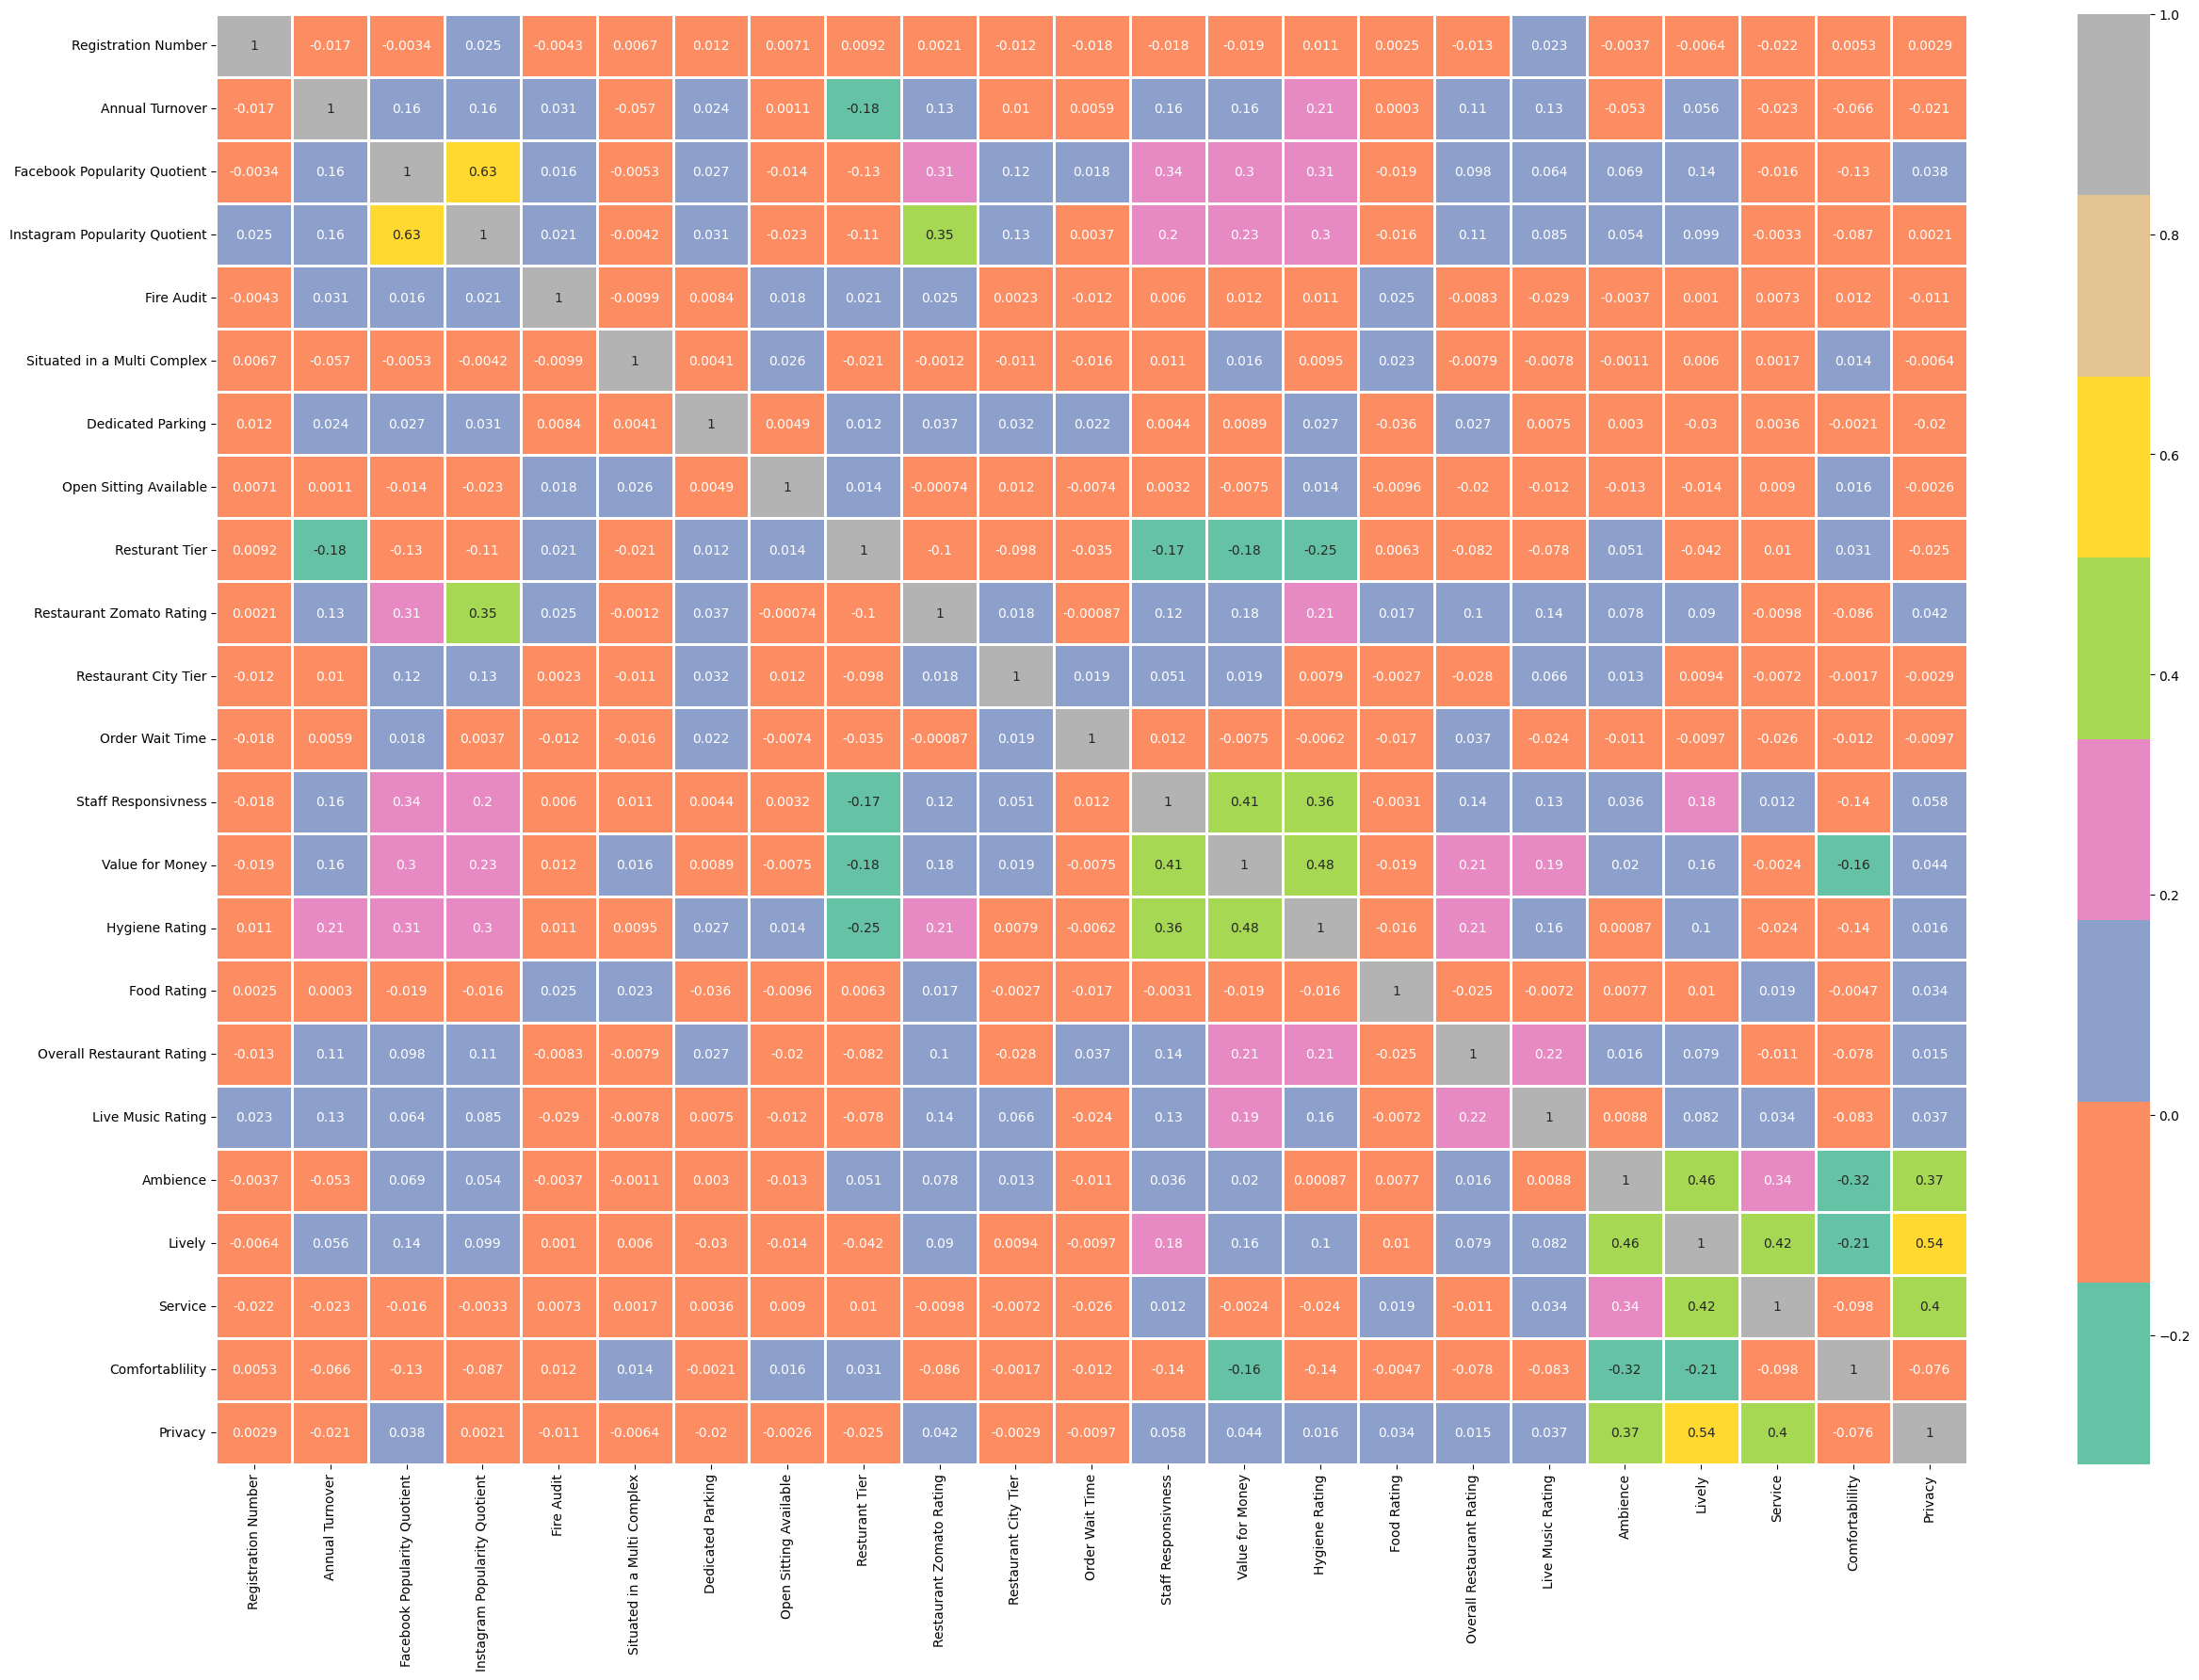

In [707]:
plt.figure(figsize=(30,20))
sns.heatmap(rest_df.select_dtypes(include=np.number).corr(),annot=True,cmap='Set2',linewidths=1);

### Key Observations:
1. **Strong Positive Correlations**:
   - Features like **Annual Turnover**, **Facebook Popularity Quotient**, and **Instagram Popularity Quotient** are strongly correlated, suggesting that social media engagement is a significant driver of revenue.
   - **Value for Money** and **Hygiene Rating** have a strong positive correlation, indicating that customers often associate value with cleanliness.

2. **Weak or No Correlations**:
   - Some features, like **Registration Number**, show weak or no correlation with other variables, as they may not influence the dependent variables significantly.

3. **Negative Correlations**:
   - There is some negative correlation between **Hygiene Rating** and **Restaurant Tier**, suggesting that high-tier restaurants may need to focus more on hygiene perceptions.

### Insights:
- Social media presence plays a critical role in increasing turnover.
- Staff responsiveness,value for money,hygine ratings,Zoato ratings and live music rating has impact on turn over as well
- Customer satisfaction (e.g., hygiene, value for money) is interconnected and impacts overall restaurant ratings.
- Identifying and leveraging highly correlated features can improve predictive modeling.


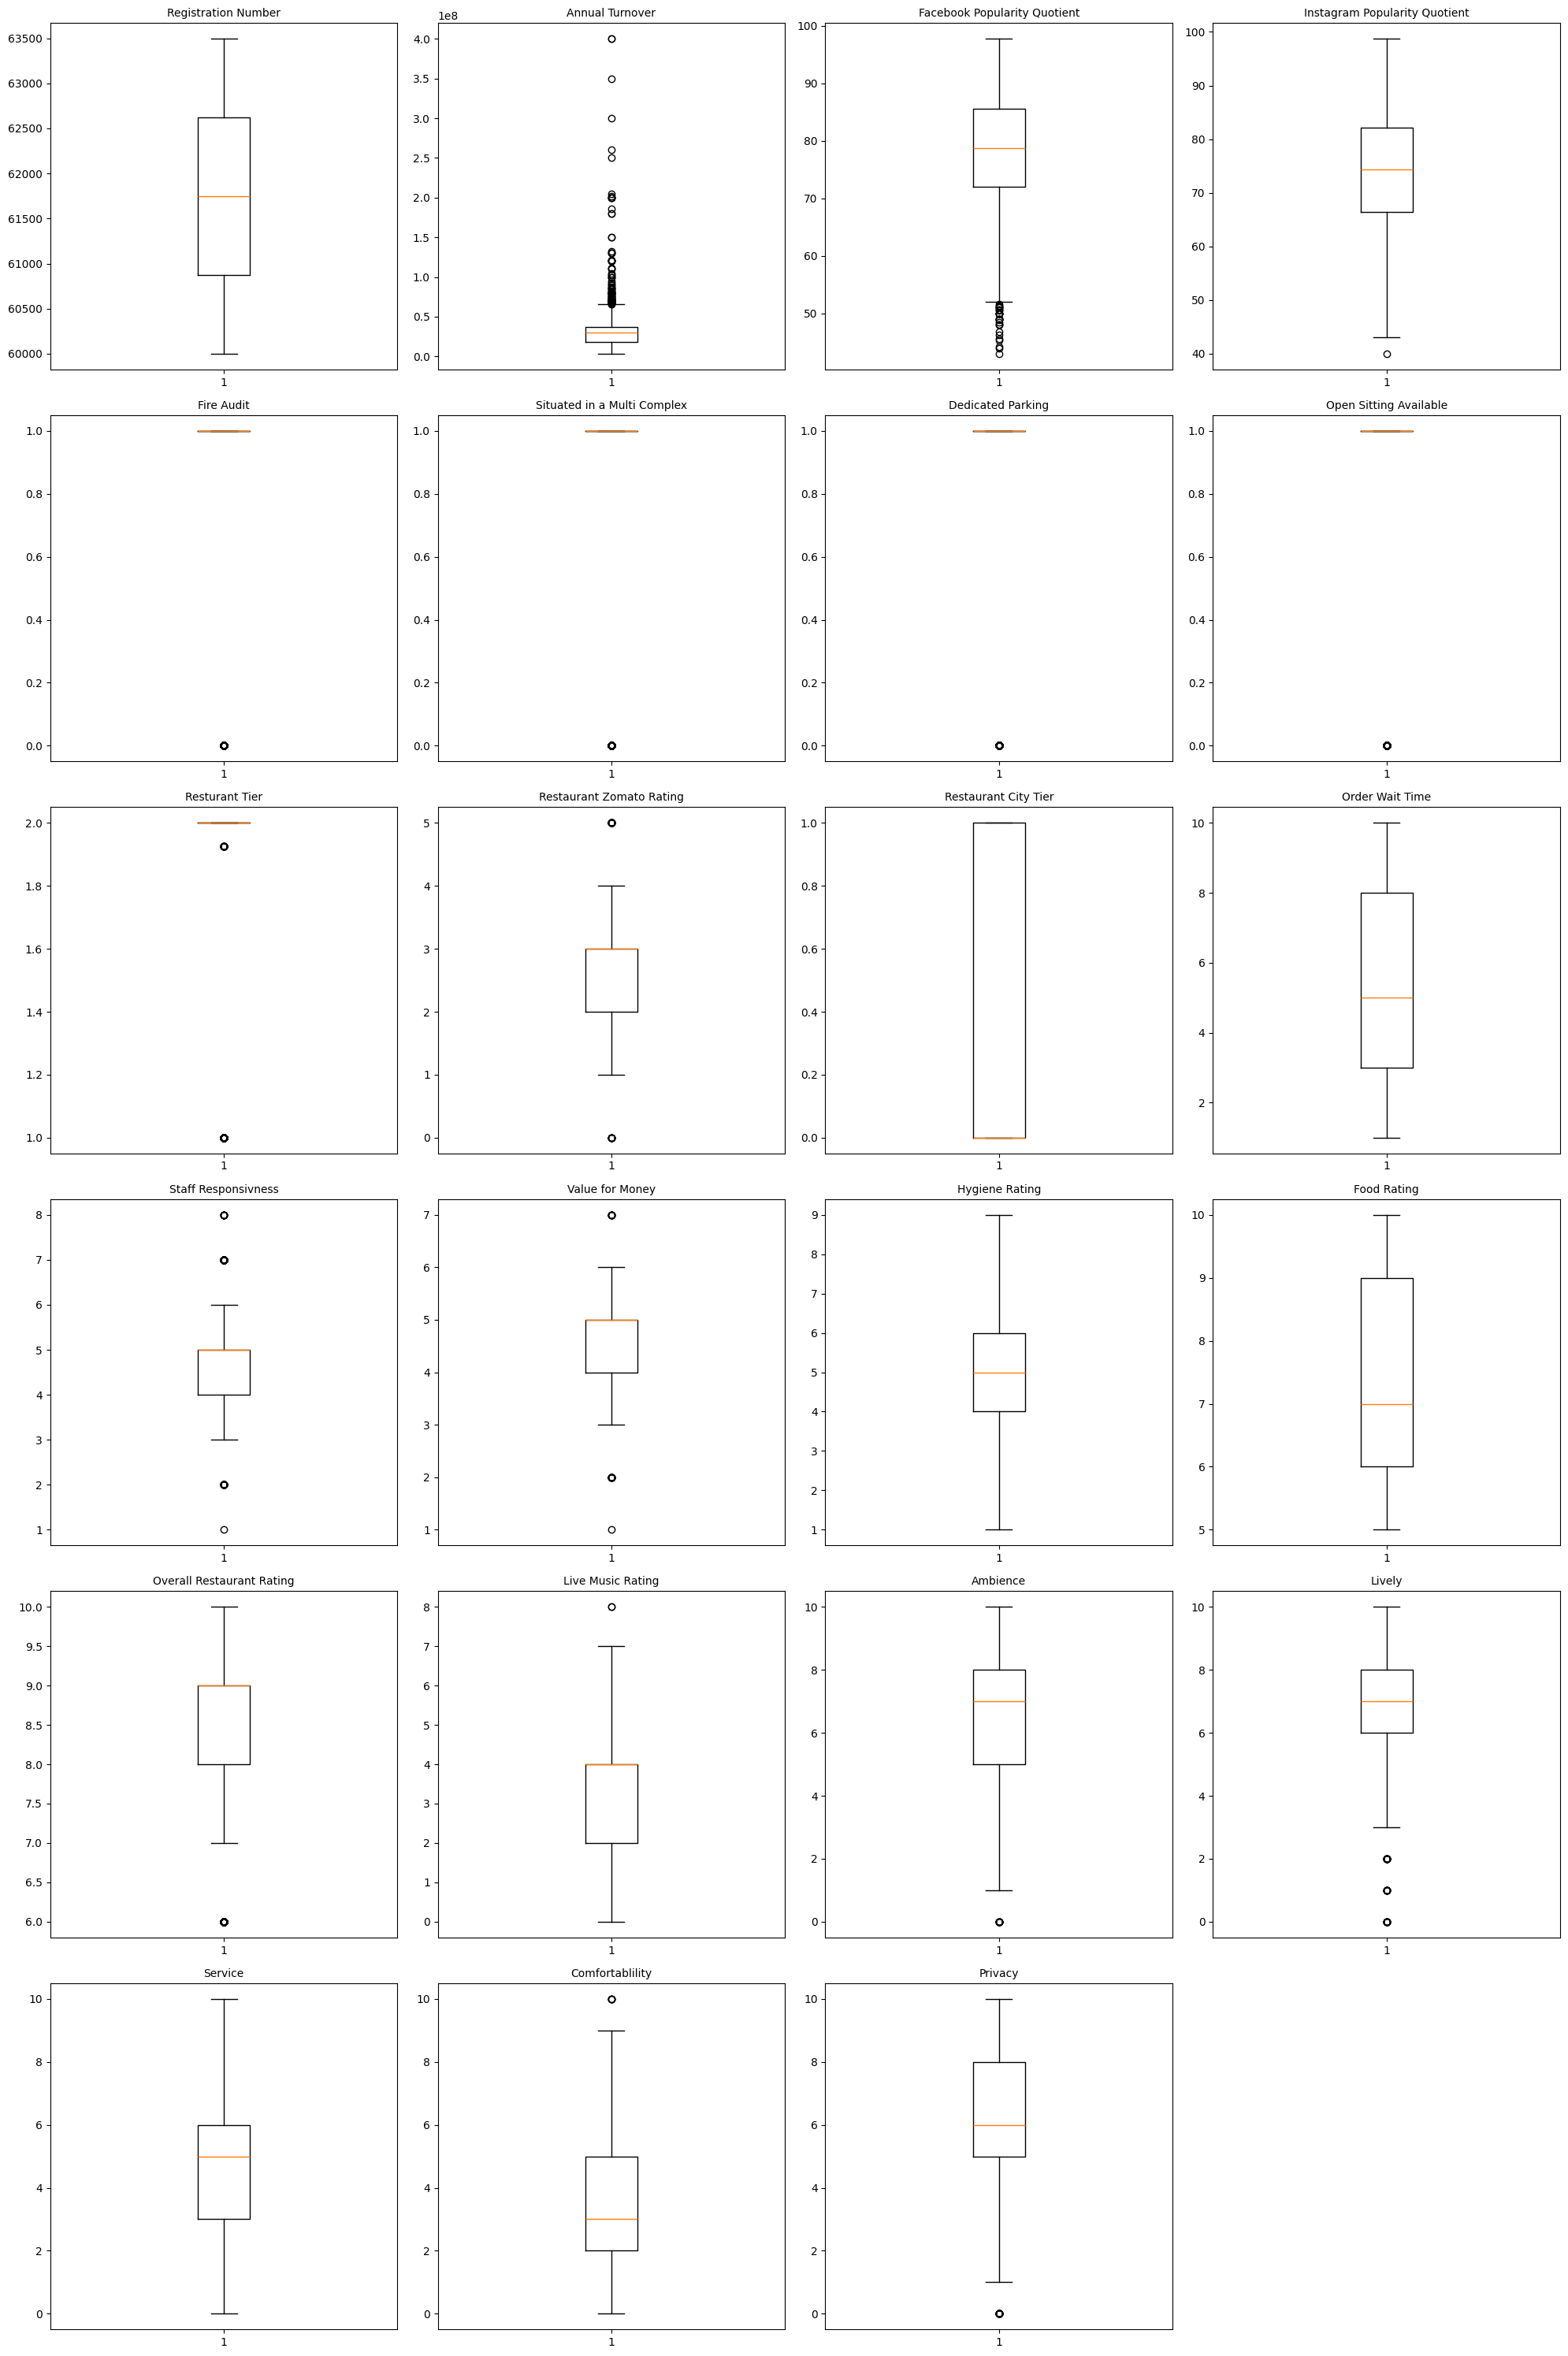

In [708]:
# Select numerical columns
numerical_col = rest_df.select_dtypes(include=np.number).columns.tolist()
num_columns = len(numerical_col)

# Calculate grid size
rows = (num_columns // 4) + (num_columns % 4 > 0)  # 4 subplots per row
cols = 4  # Fixed number of columns

# Set the figure size
plt.figure(figsize=(5 * cols, 5 * rows))  # Adjust figure size dynamically

# Plot boxplots for each numerical column
for i, variable in enumerate(numerical_col):
    plt.subplot(rows, cols, i + 1)  # Ensure subplot numbering starts from 1
    plt.boxplot(rest_df[variable].dropna(), whis=1.5)  # Handle NaN values
    plt.title(variable, fontsize=10)

# Prevent overlapping of plots
plt.tight_layout()

# Display the plots
plt.show()

There are some outliers and even anualturnover max value is quite high as well.we will treat Those

In [709]:
# drop registration Number
rest_df.drop(columns=['Registration Number'],inplace=True)

In [710]:
# function to check for outlier
def check_outliers(data, feature):
  """function to check for outliers in feature"""
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)

  IQR = Q3 - Q1                   #Inter Quantile Range
  lower_whisker = Q1 - 1.5*IQR    #lower whisker
  upper_whisker = Q3 + 1.5*IQR    #upper whisker

  #calculate percentage of outliers
  print(f"Percentage of outliers in {feature}: ", round(((data[feature] < lower_whisker) | (data[feature] > upper_whisker)).sum()/data.shape[0]*100,2))

In [711]:
#select numerical columns except Registration Number
numerical_columns=rest_df.select_dtypes(include="number").columns.tolist()

#check outliers for all numerical columns
for col in numerical_columns:
  check_outliers(rest_df, col)

Percentage of outliers in Annual Turnover:  2.72
Percentage of outliers in Facebook Popularity Quotient:  0.92
Percentage of outliers in Instagram Popularity Quotient:  0.03
Percentage of outliers in Fire Audit:  21.13
Percentage of outliers in Situated in a Multi Complex:  19.18
Percentage of outliers in Dedicated Parking:  19.81
Percentage of outliers in Open Sitting Available:  19.98
Percentage of outliers in Resturant Tier:  8.65
Percentage of outliers in Restaurant Zomato Rating:  1.46
Percentage of outliers in Restaurant City Tier:  0.0
Percentage of outliers in Order Wait Time:  0.0
Percentage of outliers in Staff Responsivness:  5.21
Percentage of outliers in Value for Money:  1.4
Percentage of outliers in Hygiene Rating:  0.0
Percentage of outliers in Food Rating:  0.0
Percentage of outliers in Overall Restaurant Rating:  8.25
Percentage of outliers in Live Music Rating:  0.06
Percentage of outliers in Ambience:  0.6
Percentage of outliers in Lively:  2.43
Percentage of outlie

In [712]:
rest_df.columns

Index(['Annual Turnover', 'Cuisine', 'City', 'Restaurant Location',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Endorsed By', 'Instagram Popularity Quotient', 'Fire Audit',
       'Situated in a Multi Complex', 'Dedicated Parking',
       'Open Sitting Available', 'Resturant Tier', 'Restaurant Type',
       'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier',
       'Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating',
       'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility',
       'Privacy'],
      dtype='object')

In [713]:
rest_df.head(5)

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Situated in a Multi Complex,...,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.30,Not Specific,95.80,1,1,...,5,5,7,10.00,4.00,8.00,8,6,6,6
1,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.40,Tier A Celebrity,85.00,1,1,...,6,7,8,9.00,0.00,5.00,7,7,3,8
2,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.00,Tier A Celebrity,68.20,1,1,...,5,3,7,8.00,3.00,7.00,10,5,2,8
3,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.60,Tier A Celebrity,83.60,0,1,...,5,6,8,9.00,6.00,7.00,7,4,3,5
4,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,77.94,Tier A Celebrity,76.80,1,1,...,6,4,8,6.00,0.00,6.42,6,2,4,6


In [714]:
rest_df['Opening Day of Restaurant'] = pd.to_datetime(rest_df['Opening Day of Restaurant'], format='%d/%m/%y', errors='coerce')
rest_df['Years Since Opening'] = (pd.to_datetime('today') - rest_df['Opening Day of Restaurant']).dt.days / 365.25
rest_df.drop(columns=['Opening Day of Restaurant'],inplace=True)

In [715]:
#transforming independent variables
rest_df['Years Since Opening'] = np.log1p(rest_df['Years Since Opening'])
rest_df['Resturant Tier'] = np.sqrt(rest_df['Resturant Tier'])
rest_df['Restaurant City Tier'] = np.sqrt(rest_df['Restaurant City Tier'])

In [716]:
scaler = StandardScaler()
rest_df[rest_df.select_dtypes(include='number').columns.tolist()] = scaler.fit_transform(rest_df[rest_df.select_dtypes(include='number').columns.tolist()])

In [717]:
# Combine normalized Facebook Popularity Quotient and Instagram Popularity Quotient into one variable
rest_df['Media Popularity'] = (rest_df['Facebook Popularity Quotient'] + rest_df['Instagram Popularity Quotient']) / 2
# Drop the original Facebook Popularity Quotient and Instagram Popularity Quotient columns
rest_df = rest_df.drop(['Facebook Popularity Quotient', 'Instagram Popularity Quotient'], axis=1)


In [718]:
df=rest_df.copy(deep=True)

In [719]:
def split_train_test(data, target_column, test_size=0.3, random_state=1, add_constant=False, drop_first=True):
    """
    Splits the dataset into training and test sets, with an option to add a constant and create dummy variables.

    Parameters:
    - data (DataFrame): The full DataFrame containing the features and target.
    - target_column (str): The name of the target column to predict.
    - test_size (float, optional): The proportion of the data to include in the test split. Default is 0.3.
    - random_state (int, optional): Controls the shuffling applied to the data before splitting. Default is 1.
    - add_constant (bool, optional): If True, adds a constant (intercept) to the feature set. Default is False.
    - drop_first (bool, optional): If True, drop the first category in the dummy variable encoding to avoid multicollinearity. Default is True.

    Returns:
    - X_train (DataFrame): Training features.
    - X_test (DataFrame): Test features.
    - y_train (Series): Training target.
    - y_test (Series): Test target.
    """
    # Separate target and features
    X = data.drop([target_column], axis=1)
    Y = data[target_column]

    # Add constant if specified
    if add_constant:
        X = sm.add_constant(X)

    # Create dummy variables
    X = pd.get_dummies(X, drop_first=drop_first)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [720]:
def print_dataset_shapes_and_class_distribution(X_train, X_test, y_train, y_test):
    """
    Print the shapes of training and test datasets, along with the percentage of classes in each set.

    Parameters:
    X_train (DataFrame): Training feature set.
    X_test (DataFrame): Test feature set.
    y_train (Series): Training target set.
    y_test (Series): Test target set.
    """
    # Shape of Test and Train Data
    print("Shape of Training set:", X_train.shape)
    print("Shape of Test set:", X_test.shape)

    # Percentage of classes in training set
    print("\nPercentage of classes in Training set:")
    print(y_train.value_counts(normalize=True))

    # Percentage of classes in test set
    print("\nPercentage of classes in Test set:")
    print(y_test.value_counts(normalize=True))

In [721]:
# Divide the data in to train and testset this will be used for Logistic regression as we pass add constant as true
X_train, X_test, y_train, y_test = split_train_test(df, target_column='Annual Turnover',test_size=0.3,add_constant=True)

In [679]:
# # apply
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [680]:
print_dataset_shapes_and_class_distribution(X_train, X_test, y_train, y_test)

Shape of Training set: (2445, 251)
Shape of Test set: (1048, 251)

Percentage of classes in Training set:
Annual Turnover
-0.03   0.08
-0.89   0.06
-0.68   0.05
0.08    0.05
-2.00   0.04
        ... 
0.91    0.00
1.27    0.00
2.76    0.00
0.82    0.00
1.12    0.00
Name: proportion, Length: 144, dtype: float64

Percentage of classes in Test set:
Annual Turnover
-0.03   0.06
-0.89   0.06
-0.68   0.05
0.08    0.05
-2.00   0.04
        ... 
2.60    0.00
0.70    0.00
1.25    0.00
1.33    0.00
1.15    0.00
Name: proportion, Length: 124, dtype: float64


In [682]:
y_train.isna().sum()

48